<a href="https://colab.research.google.com/github/Lakshminarayana29/BigMart-Product-Outlet-Sales-Analysis-and-Prediction/blob/main/Bigmart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Description**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

1).Problem Statement

2).Hypothesis Generation

3).Loading Packages and Data

4).Data Structure and Content

5).Exploratory Data Analysis

6).Univariate Analysis

7).Bivariate Analysis

8).Missing Value Treatment

9).Feature Engineering

10).Encoding Categorical Variables

11).Label Encoding

12).One Hot Encoding

13).PreProcessing Data

14).Modeling

15).Linear Regression

16).Regularized Linear Regression

17).RandomForest

18).XGBoost

19).Summary



**Problem statement:**

The problem statement is to build a predictive model to determine the sales of each product at a particular store using the provided sales data for 1559 products across 10 stores in different cities, along with certain attributes of each product and store.

 The aim is to develop a model that can accurately predict sales, which can help in identifying factors that drive sales and improve business decisions.

**Hypothesis Generation:**

1.)**Brand:** Branded products have more trust of the customers so they should have high sales

2.)**City type:** Stores located in urban cities should have higher sales.

3.)**Population density:**Densely populated areas have high demands so the store located in these areas should have higher sales.

4.)**Marketing:** Stores having a good marketing division can attract customers through the right offers.

5.)**Visibility in Store:** The location of the product placement also depends on the sales.

6.)**Utility:** Daily use products have a higher tendency to sell compared to other products.

7.)**Packaging:** Quality packaging can attract customers and sell more.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
# Load the datasets 
train=pd.read_csv("/content/drive/MyDrive/Train.csv")
# Displaying the first few rows of the data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Load the datasets 
test=pd.read_csv("/content/drive/MyDrive/Test.csv")
# Displaying the first few rows of the data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [ ]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
train.fillna(train.mean(),inplace=True)
train.isnull().sum()

<ipython-input-245-8395cca6d7d7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(),inplace=True)


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.fillna(test.mean(),inplace=True)
test.isnull().sum()

<ipython-input-246-736e4e11a7dd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(),inplace=True)


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Encoding Categorical Variables:**
**bold text**
Encoding categorical variables refers to the process of converting categorical data into numerical form so that it can be used as input for machine learning models.

Machine learning algorithms typically require numerical data, so categorical data must be transformed into numerical form.

These are severalmethods for encode categorical variables:

1.)**Label Encoding:** This involves assigning each category a unique integer label.

2.)**One-Hot Encoding:** This involves creating a new binary feature for each category, indicating whether the original feature was that category or not.

3.)**Ordinal Encoding:** This involves assigning each category a numerical value based on its order or rank.

In [ ]:
#filling the string values with mode
train=train.drop(['Item_Identifier'],axis=1)
train_cat_col = train.select_dtypes(include=('object')).columns
for c in train_cat_col:
    train[c].fillna(train[c].mode().values[0], inplace=True)

train.select_dtypes(include=('object')).isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [ ]:
#filling the string values with mode
test=test.drop(['Item_Identifier'],axis=1)
test_cat_col = test.select_dtypes(include=('object')).columns
for c in test_cat_col:
    test[c].fillna(test[c].mode().values[0], inplace=True)

test.select_dtypes(include=('object')).isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0})  
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0})  

In [ ]:
train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
encoder = LabelEncoder()
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
print('Number of trainings examples:', len(train),'\n')
train.describe()

Number of trainings examples: 8523 



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


**Exploratory data analysis**

It is an approach to analyzing and understanding data that emphasizes exploring the data to discover patterns, relationships, and anomalies.

 The goal of EDA is to gain a deep understanding of the data, identify key insights and trends, and generate hypotheses that can be tested with statistical modeling.

There are few techniques here :-

1.)**Statistical analysis:** Using statistical methods to identify correlations, outliers, and other key characteristics of the data.

**2.)Visualization:** Creating visual representations of the data such as histograms, scatterplots, boxplots, and heatmaps to help identify patterns and relationships.

**3.)Data cleaning:** Identifying and handling missing values, outliers, and other data quality issues that may affect the analysis.

**4.)Data transformation:** Applying mathematical transformations such as logarithmic or power transformations to the data to help normalize the distribution and improve model performance.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


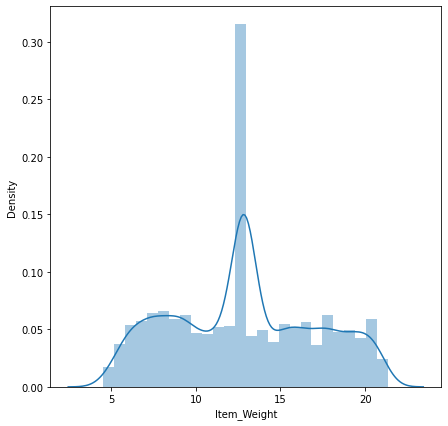

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(7,7))
sns.distplot(train['Item_Weight'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


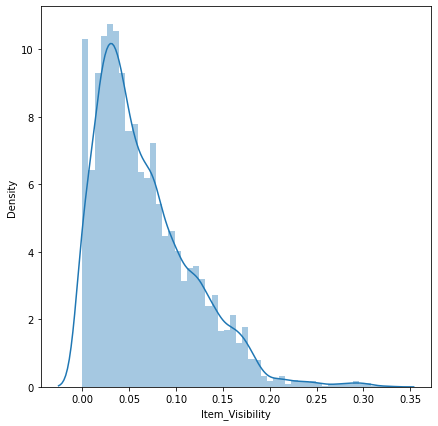

In [ ]:
# Item_Visibility distribution
plt.figure(figsize=(7,7))
sns.distplot(train['Item_Visibility'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


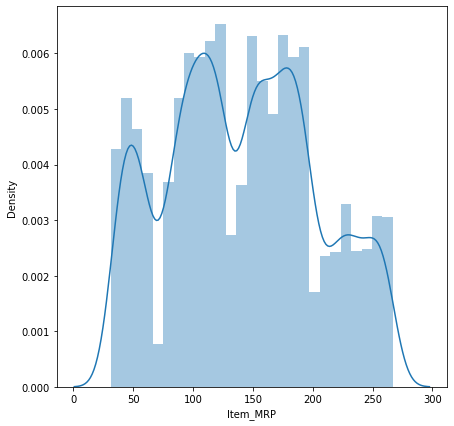

In [ ]:
# Item_MRP distribution
plt.figure(figsize=(7,7))
sns.distplot(train['Item_MRP'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


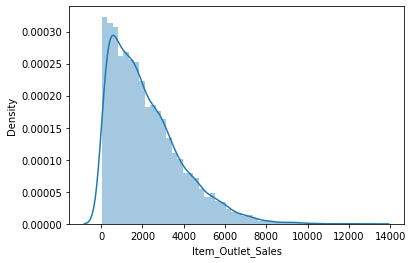

In [ ]:
# Item_Outlet_Sales distribution
train['Item_Outlet_Sales'].describe()
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


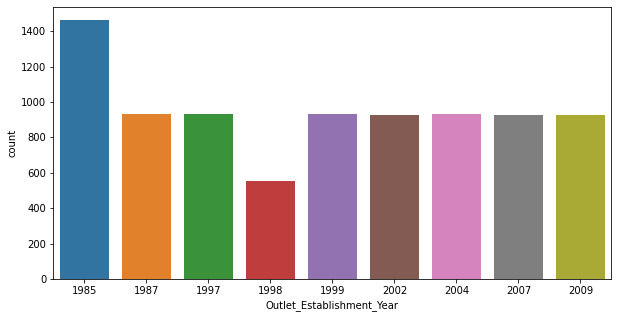

In [ ]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Establishment_Year'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


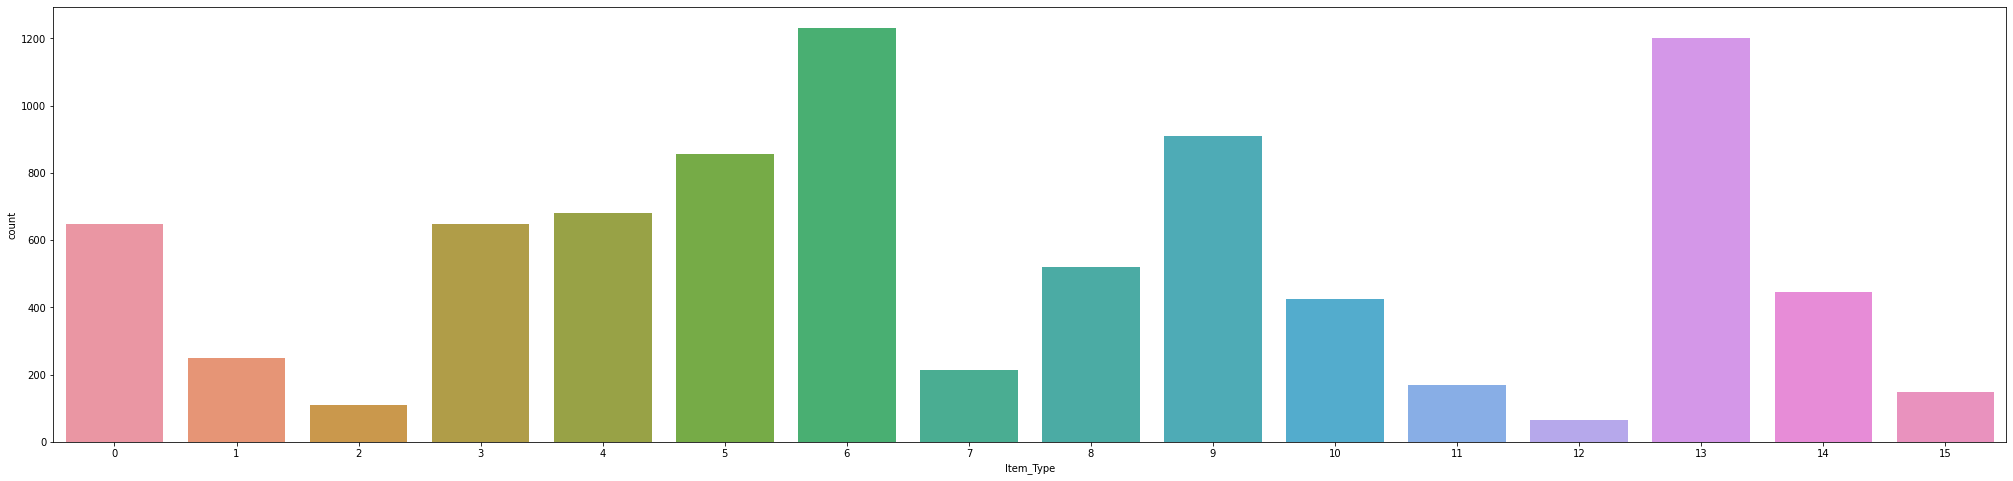

In [ ]:
# Item_Type distribution
plt.figure(figsize=(35,8))
sns.countplot('Item_Type',data=train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


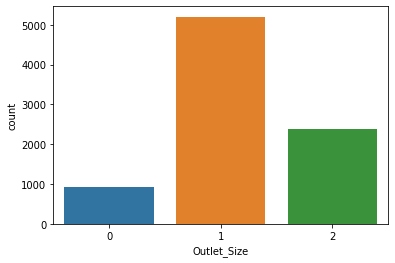

In [ ]:
# Outlet_Size distribution
sns.countplot('Outlet_Size',data=train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


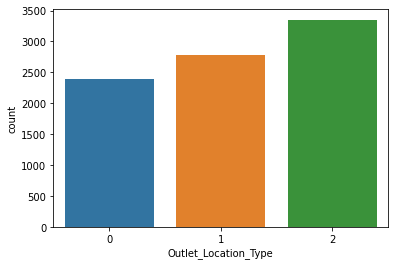

In [ ]:
# Outlet_Location_Type distribution
sns.countplot('Outlet_Location_Type',data=train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


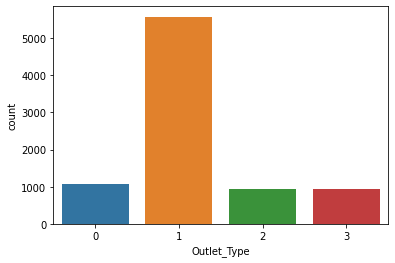

In [ ]:
# Outlet_Type distribution
sns.countplot('Outlet_Type',data=train)
plt.show()

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

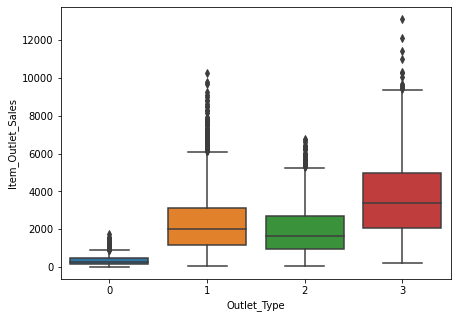

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(7,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

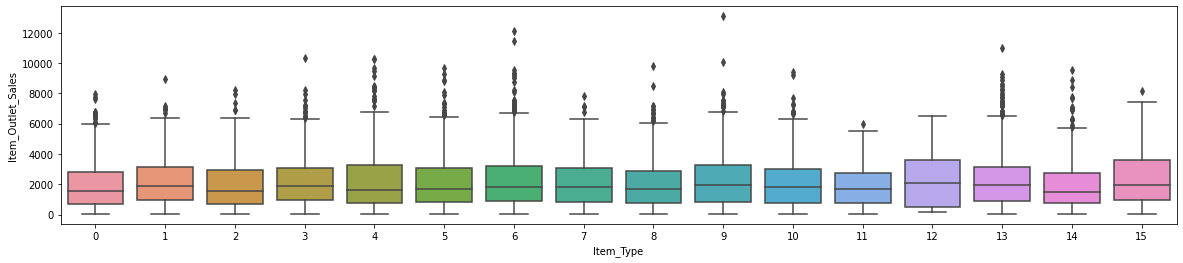

In [ ]:
# Outlier Analysis
plt.figure(figsize=(20,4))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)

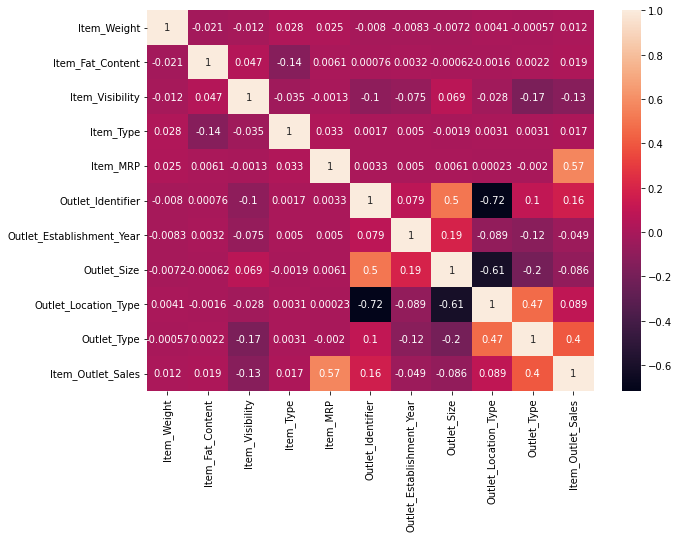

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,7))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Compute the Z-scores for each column in the dataset
z_scores = np.abs((train - train.mean()) / train.std())
# Remove the rows that contain outliers
train = train[(z_scores < 3).all(axis=1)]


In [ ]:
z_scores.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.837127,0.736601,1.011447,0.766543,1.771725,1.495923,0.120542,0.278857,1.370263,0.259823,1.012965
1,1.631938,1.357425,0.943263,1.610075,1.482850,0.614985,1.322644,0.278857,1.098994,1.022073,1.070187
2,1.091111,0.736601,0.996405,0.659427,0.024596,1.495923,0.120542,0.278857,1.370263,0.259823,0.023555
3,1.490868,1.357425,1.350100,0.291220,0.678240,1.670439,0.000332,0.278857,1.098994,1.541719,0.887321
4,0.924133,0.736601,1.350100,0.421766,1.392544,1.318621,1.321981,1.940838,1.098994,0.259823,0.721309


In [ ]:
X=pd.DataFrame(train.iloc[:,: -1].values)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,5.92,1.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0
2,17.50,0.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0
3,19.20,1.0,0.000000,6.0,182.0950,0.0,1998.0,1.0,2.0,0.0
4,8.93,0.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0


In [ ]:
y=pd.DataFrame(train.iloc[:,-1].values)
y.head()

,0
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


**splitting dataset into training  and testing data**

In [ ]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X.shape, X_train.shape, X_test.shape

((8262, 10), (6609, 10), (1653, 10))

**LinearRegression**

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [[  -1.88234447   54.54137141 -982.40316105    1.4338867    14.33123065
    60.65204094    4.7887765  -369.03958323 -231.95237715  779.67665766]]
Intercept: [-9939.51158285]


In [ ]:
r2=metrics.r2_score(y_test,y_pred)
print('R squared value = ',r2)

R squared value =  0.5245210832018978


In [ ]:
print('Accuracy :' , r2*100)

Accuracy : 52.45210832018978


**RandomForest**

In [ ]:
reg=RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
r2=metrics.r2_score(y_test,y_pred)
print('R squared value = ',r2)

<ipython-input-284-75d17d096400>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


R squared value =  0.5574644934253331


In [ ]:
print('Accuracy :' , r2*100)

Accuracy : 55.74644934253331


**XGBoost**

In [ ]:
reg=XGBRegressor()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
r2=metrics.r2_score(y_test,y_pred)
print('R squared value = ',r2)

R squared value =  0.5233598744740561


In [ ]:
print('Accuracy :' , r2*100)

Accuracy : 52.33598744740561


**SUMMARY**

The Bigmart Sales dataset is a fictional dataset that contains information on sales data for various products sold at different stores of Bigmart stores. The dataset contains information on the sales of 1559 products across 10 different stores for the year of 2013.

The dataset includes variables such as Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, and Item_Outlet_Sales.

First importing the required libraries and load the datasets.

Now identify is there any missing values  or not in the dataset.If there is any missing values in the dataset we have to fill the missing values using statical techniques or machine learning models.

Now convert the categorical attributes to numerical attributes for machine learning model can identify uniquely.

Now we apply the data visuallization using the matplotlib and seaborn libraries.

Now split into training and testing data
and train the training data and using testing data we predict accuracy of upcoming sales by using Regression models.

Here some of the regression models

1.)LinearRegression

2.)RandomForestRegression

3.)XGBoostRegression

Here out of 3 models I predict the best accuracy in RandomForestRegression.

The Accuracy is 55.74644934253331
